## Wine Clustering
- 아래 와인 데이터를 이용하여 와인을 클러스터링하고 보고서를 작성하세요.
- 코드, 클러스터링 결과, 보고서를 종합적으로 평가합니다.
- 다음 사이트의 다양한 클러스터링 기법을 참조하세요.
- https://scikit-learn.org/stable/modules/clustering.html

In [1]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering,SpectralClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [2]:
X=wine['data']
y=wine['target']

In [3]:
X.shape, y.shape

((178, 13), (178,))

### Answer

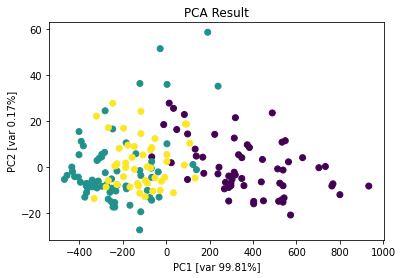

PC 1) 
 Components:	[ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
  1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
  6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
  9.99822937e-01]
 variance:	99.80912304918974%
PC 2) 
 Components:	[ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
  9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
  5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
 -1.77738095e-02]
 variance:	0.17359156247057506%


In [4]:
pca=PCA(n_components=2)
pca.fit(X)
pca_X=pca.fit_transform(X)
plt.scatter(*(np.transpose(pca_X)),c=y)
plt.xlabel("PC1 [var "+str(round(pca.explained_variance_ratio_[0]*100,2))+'%]')
plt.ylabel("PC2 [var "+str(round(pca.explained_variance_ratio_[1]*100,2))+'%]')
plt.title("PCA Result")
plt.show()

for idx,ra_co in enumerate(zip(pca.explained_variance_ratio_,pca.components_)):
    print('PC '+str(idx+1)+') \n Components:\t'+str(ra_co[1])+'\n variance:\t'+str(ra_co[0]*100)+'%')

### Kmeans Clustering

In [5]:
def corrected_label(data,kmeans,cen,labels=False):
    right_label=[]
    for idx in set(kmeans.labels_):
        kcen=data[kmeans.labels_==idx].mean(axis=0)
        distance=[np.sum((kcen-cen[jdx])**2) for jdx in range(3)]
        right_label.append(np.argmin(distance))
    corrected_label=map(lambda x: right_label[0] if x==list(set(kmeans.labels_))[0]
                         else right_label[1] if x==list(set(kmeans.labels_))[1]
                         else right_label[2]
                        ,kmeans.labels_)
    if labels:
        print(list(set(kmeans.labels_)),'=>',right_label)
    return np.array(list(corrected_label))

위 함수는 clustering 과정에서 labeling이 달라지는 것을 막기 위한 함수이다. 이 함수는 clustering한 각 그룹의 평균값과 실제 각 그룹의 평균값과의 거리를 비교하여, label을 맞추어 준다.

In [6]:
cen=[X[y==idx].mean(axis=0) for idx in range(3)]

In [7]:
kmeans=KMeans(n_clusters=3).fit(X)
print("Answer:",y)
print("Predict:",corrected_label(X,kmeans,cen))
print("accuracy:",round(sum(y==corrected_label(X,kmeans,cen))/len(y)*100,2),"%")

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predict: [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]
accuracy: 70.22 %


[0, 1, 2] => [2, 0, 1]


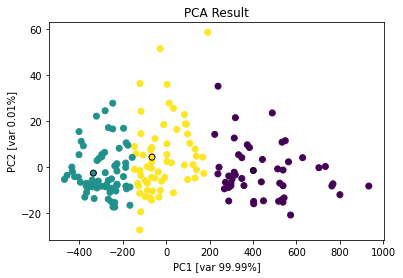

In [9]:
plt.scatter(*(np.transpose(pca_X)),c=corrected_label(X,kmeans,cen,labels=True))
plt.xlabel("PC1 [var "+str(round(pca.explained_variance_ratio_[0]*100,2))+'%]')
plt.ylabel("PC2 [var "+str(round(pca.explained_variance_ratio_[1]*100,2))+'%]')
plt.scatter(*np.transpose(pca.fit_transform(kmeans.cluster_centers_)),c=[2,0,1],edgecolors='black')
plt.title("PCA Result")
plt.show()

단순하게 Data를 kmeans Clustering을 할 때는 PCA 그래프에서도 볼 수 있듯이 겹치는 부분이 많아서 70.22%로 잘 분류되지 않았다.

### Normalization + Kmean Clustering

Raw Data의 경우 서로 겹치는 부분이 많기에 Data의 위치를 변경해야 함을 알 수 있다. 그래서 먼저 단순히 Data를 Normalization 해보았다.

- Normalization

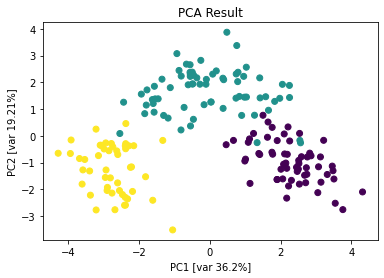

In [11]:
nor=StandardScaler()
nor.fit(X)
nor_X=nor.transform(X)
cen_nor=[nor_X[y==idx].mean(axis=0) for idx in range(3)]
pca_nor_X=pca.fit_transform(nor_X)

plt.scatter(*(np.transpose(pca_nor_X)),c=y)
plt.xlabel("PC1 [var "+str(round(pca.explained_variance_ratio_[0]*100,2))+'%]')
plt.ylabel("PC2 [var "+str(round(pca.explained_variance_ratio_[1]*100,2))+'%]')
plt.title("PCA Result")
plt.show()

- Kmeans Clustering

In [13]:
kmeans_nor=KMeans(n_clusters=3).fit(nor_X)
print("Answer:",y)
print("Predict:",corrected_label(nor_X,kmeans_nor,cen_nor))
print("accuracy:",round(sum(y==corrected_label(nor_X,kmeans_nor,cen_nor))/len(y)*100,2),"%")

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predict: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
accuracy: 96.63 %


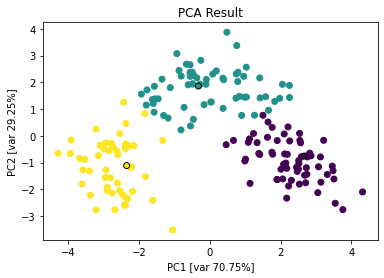

In [19]:
plt.scatter(*(np.transpose(pca_nor_X)),c=corrected_label(nor_X,kmeans_nor,cen_nor))
plt.xlabel("PC1 [var "+str(round(pca.explained_variance_ratio_[0]*100,2))+'%]')
plt.ylabel("PC2 [var "+str(round(pca.explained_variance_ratio_[1]*100,2))+'%]')
plt.title("PCA Result")
plt.scatter(*np.transpose(pca.fit_transform(kmeans_nor.cluster_centers_)),c=[2,0,1],edgecolors='black')
plt.show()

Data를 Normalization 하면 각 그룹별로 Data가 적절하게 떨어져 있는 것을 PCA 그래프를 통해서 알 수 있었고, 실제로 이 Data를 기반으로 kmeans Clustering한 결과 96.63%로 높은 정확도를 보여준다.

### PCA + Normalization + k-mean clustering

In [22]:
cen_pca_nor=[pca_nor_X[y==idx].mean(axis=0) for idx in range(3)]

In [23]:
kmeans_pca=KMeans(n_clusters=3).fit(pca_nor_X)
print("Answer:",y)
print("Predict:",corrected_label(pca_nor_X,kmeans_pca,cen_pca_nor))
print("accuracy:",round(sum(y==corrected_label(pca_nor_X,kmeans_pca,cen_pca_nor))/len(y)*100,2),"%")

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predict: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
accuracy: 96.63 %


새로운 방식으로 17차원의 Data가 아닌 PCA를 한 2차원의 data로 kmean clustering을 시도해 보았지만 결과에  차이는 없었다.

### DBSCAN

<div>
<img src="dbscan.png" width="250"/>
</div>

DBSCAN은 밀도를 기반으로 Clustering 하는 방식이다. core point를 기준으로 반경을 그리고, 해당 반경 안에 특정 개수의 점이 들어오면 그 그룹을 한 그룹으로 보는 방식이다. 만약 어떤 core point가 다른 core point의 그룹에 속하면, 두 core point에 속한 점들을 한 그룹으로 본다. 한편, 어떤 그룹에도 속하지 않은 점을 nosie라고 하면, 결과에서 "-1"로 표기된다.

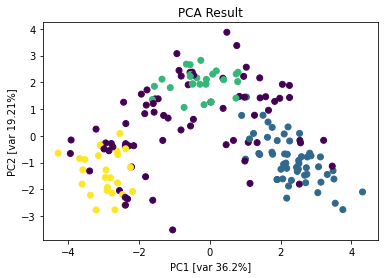

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predicted: [ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0 -1  0 -1  0  0
  0  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1  0 -1  1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  2 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1
 -1 -1 -1 -1  1  1  1  1  1 -1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1 -1  1
  1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1  2
 -1  2  2  2  2  2 -1 -1 -1  2 -1  2  2 -1 -1 -1  2  2 -1  2  2  2  2  2
  2 -1 -1  2  2  2  2  2 -1  2]
[0, 1, 2, -1] => [0, 1, 2, 1]
accuracy: 69.66 %


In [275]:
dbscan=DBSCAN(eps=1.14*np.sqrt(17/4), min_samples=12).fit(nor_X)
#eps는 원의 반경, min_sample은 그룹으로 인정할 해당 반경 안에 들어올 최소점의 개수이다.

plt.scatter(*(np.transpose(pca_nor_X)),c=dbscan.labels_)
plt.xlabel("PC1 [var "+str(round(pca.explained_variance_ratio_[0]*100,2))+'%]')
plt.ylabel("PC2 [var "+str(round(pca.explained_variance_ratio_[1]*100,2))+'%]')
plt.title("PCA Result")
plt.show()
print("Answer:",y)
print("Predicted:",dbscan.labels_)
print("accuracy:",round(sum(y==corrected_label(nor_X,dbscan,cen_nor,labels=True))/len(y)*100,2),"%")

DBSCAN의 경우 Sample의 개수를 입력하지 않아도 되는 장점이 있지만, 현재는 그룹이 세 가지라는 것을 알고 있다. 그렇기에 이를 사용하지 않고 세 그룹으로 분류할 때까지 parameter를 조정해야 하며, 이는 쉬운 일이 아니다. 특히 wine data에서는 normalization을 통해 data가 그룹별로 잘 분류되게 만들었음에도 불구하고, 서로 겹치는 부분이 존재해서 DBSCAN에서 한 그룹으로 분류한다. 따라서 적절한 기준점을 찾는 것이 힘들다.

### T-SNE + DBSCAN

다음 Data 위치를 변경할 방법으로 T-SNE를 생각했다. T-SNE는 차원을 축소하는 과정에서 고차원에서 근처에 있던 점들이 축소된 차원에서도 근처에 있게 한다. 이를 위해서 T-SNE는 각 점에서 Gaussian 분포를 이용해서 근처 값들을 수치화하여, 근처에 있는 점은 더 가까이 오도록 한다. 따라서, TSNE의 learning_rate를 너무 높이면, 모든 값들이 한 곳에 모이는 현상이 발생한다는 주의점도 있다.

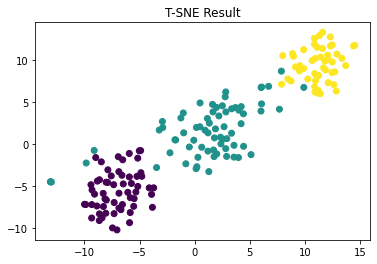

In [98]:
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=340)
tsne_nor_X = tsne.fit_transform(nor_X)
plt.scatter(*np.transpose(tsne_nor_X),c=y)
plt.title("T-SNE Result")
plt.show()

In [99]:
cen_tsne=[tsne_nor_X[y==idx].mean(axis=0) for idx in range(3)]

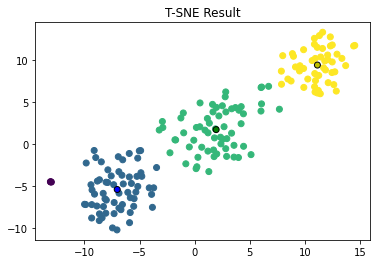

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predicted: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 0 1 0
 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0, 1, 2, -1] => [0, 1, 2, 0]
accuracy: 95.51 %


In [105]:
dbscan_tsne=DBSCAN(eps=1.15*np.sqrt(17/4), min_samples=9).fit(tsne_nor_X)
plt.scatter(*(np.transpose(tsne_nor_X)),c=dbscan_tsne.labels_)
plt.title("T-SNE Result")

cen_db=[tsne_nor_X[dbscan_tsne.labels_==idx].mean(axis=0) for idx in [0,1,2]]
plt.scatter(*(np.transpose(cen_db)),c=['b','g','y'],edgecolors='black')
plt.show()

print("Answer:",y)
print("Predicted:",corrected_label(tsne_nor_X,dbscan_tsne,cen_tsne))
print("accuracy:",round(sum(y==corrected_label(tsne_nor_X,dbscan_tsne,cen_tsne,labels=True))/len(y)*100,2),"%")

T-SNE를 이용해서 차원 축소를 한 결과 DBSCAN의 결과가 향상되었음을 알 수 있다. 이는 T-SNE가 근처에 있는 점들이 차원을 축소해도 근처에 있게 하기 때문에 밀도를 기준으로 하는 DBSCAN과 같이 적용할 때 효과적이기 때문이다. 하지만, PCA와 달리 T-SNE는 항상 같은 분포를 주지 않아서, 분류의 안정성에 문제가 있다.

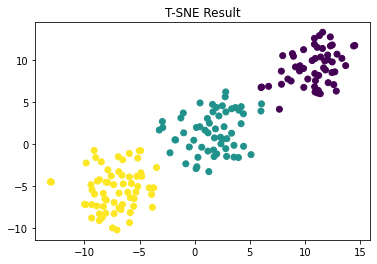

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predicted: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 1 1 1 1 2 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0, 1, 2] => [2, 1, 0]
accuracy: 93.26 %


In [106]:
kmeans_tsne=KMeans(n_clusters=3).fit(tsne_nor_X)
plt.scatter(*(np.transpose(tsne_nor_X)),c=kmeans_tsne.labels_)
plt.title("T-SNE Result")
plt.show()

print("Answer:",y)
print("Predicted:",corrected_label(tsne_nor_X,kmeans_tsne,cen_tsne))
print("accuracy:",round(sum(y==corrected_label(tsne_nor_X,kmeans_tsne,cen_tsne,labels=True))/len(y)*100,2),"%")

추가적으로 T-SNE한 Data를 기준으로 kmean clustering한 경우에서는 앞선 Normalization만 한 경우보다 정확도가 오히려 더 떨어진다.

### Hierarchical clustering

<div>
<img src="cluster.png" width="300"/>
</div>

HC(Hierarchical Clutering)는 특정 유사도를 기준으로 순차적으로 분류하는 방식이다. 이는 크게 응집형과 분리형으로 나뉘는데, 여기서는 응집형 HC를 사용하였다. 또한, 유사도로는 euclidean 거리, 연결법으로는 Ward를 사용하였다. 

In [107]:
HC_nor = AgglomerativeClustering(n_clusters=3,linkage='ward').fit(nor_X)
HC_tsne = AgglomerativeClustering(n_clusters=3,linkage='ward').fit(tsne_nor_X)


print("Answer:",y,'\n')

print("Nor Prediction:",corrected_label(nor_X,HC_nor,cen_nor))
print("accuracy:",round(sum(y==corrected_label(nor_X,HC_nor,cen_nor))/len(y)*100,2),"%",'\n')

print("T-SNE Prediction:",corrected_label(tsne_nor_X,HC_tsne,cen_tsne))
print("accuracy:",round(sum(y==corrected_label(tsne_nor_X,HC_tsne,cen_tsne))/len(y)*100,2),"%",'\n')

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

Nor Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 1 0 0 1 2 1 2 0 1 0
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
accuracy: 92.7 % 

T-SNE Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 

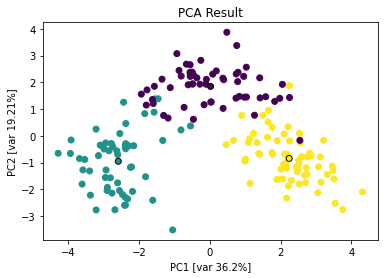

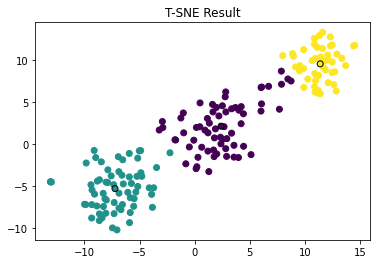

In [108]:
plt.figure('HC_PCA.Result')
plt.scatter(*(np.transpose(pca_nor_X)),c=HC_nor.labels_)
plt.xlabel("PC1 [var "+str(round(pca.explained_variance_ratio_[0]*100,2))+'%]')
plt.ylabel("PC2 [var "+str(round(pca.explained_variance_ratio_[1]*100,2))+'%]')
plt.title("PCA Result")
cen_HC=[pca_nor_X[HC_nor.labels_==idx].mean(axis=0) for idx in [0,1,2]]
plt.scatter(*(np.transpose(cen_HC)),c=[0,1,2],edgecolors='Black')


plt.figure('HC_TNSE.Result')
plt.scatter(*(np.transpose(tsne_nor_X)),c=HC_tsne.labels_)
cen_HC=[tsne_nor_X[HC_tsne.labels_==idx].mean(axis=0) for idx in [0,1,2]]
plt.scatter(*(np.transpose(cen_HC)),c=[0,1,2],edgecolors='Black')
plt.title("T-SNE Result")
plt.show()

HC 방법의 결과는 92.7%은 높은 편이나 kmeans clustering 보다 정확도가 높지 않았다. 또한, HC에서는 normalization을 한 Data 보다, T-SNE한 Data를 기준으로 분류하는 것이 정확도가 더 높았다.

### Affinity Propagation 

<div>
<img src="AP.png", width="300"/>
</div>

 AP(Affinity Propagation)는 두 점 사이의 responsibility와 availability를 비교하여 특정 점이 다른 한 점을 대표한다는 방식으로 특정 그룹을 대표하는 Data를 찾는 방식이다 여기서 responsibility는 대표가 되어야 하는 지표, availability는 특정 Data를 대표로 선정해야하는 지표를 나타낸다. 함수의 주요 parameter로는 preference가 있다. 이는 자기 자신에 대한 유사도를 의미하며, cluster 개수를 결정하는 데 중요하다.

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
accuracy: 94.94 %


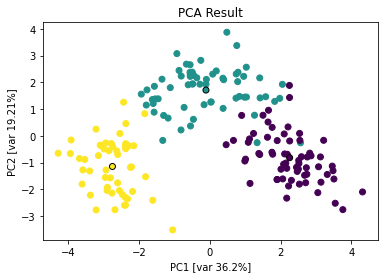

In [109]:
from sklearn.cluster import AffinityPropagation

AP=AffinityPropagation(damping=0.5, preference=-230,random_state=5).fit(nor_X)

print("Answer:",y)
print("Prediction:",corrected_label(nor_X,AP,cen_nor))
print("accuracy:",round(sum(y==corrected_label(nor_X,AP,cen_nor))/len(y)*100,2),"%")

plt.scatter(*(np.transpose(pca_nor_X)),c=AP.labels_)
plt.xlabel("PC1 [var "+str(round(pca.explained_variance_ratio_[0]*100,2))+'%]')
plt.ylabel("PC2 [var "+str(round(pca.explained_variance_ratio_[1]*100,2))+'%]')
plt.title("PCA Result")
cen_AP=[pca_nor_X[AP.labels_==idx].mean(axis=0) for idx in [0,1,2]]
plt.scatter(*(np.transpose(cen_AP)),c=[0,1,2],edgecolors='Black')
plt.show()

 AP는 94.94%로 좋은 결과를 보여주었지만, kmeans Clustering 보다는 좋은 결과를 주지는 못하였다. 또한 그룹의 수를 직접 결정해주는 것이 아니라서, 현재와 Data 분류와 적합하지는 않는다고 판단된다.

### Gaussian Mixture Model

<div>
<img src="gmm.png"width="250"/>
</div>

GMM(Gaussian Mixture Model)은 Data 분포가 Gaussian 분포라고 가정하고, 해당 Data에 가장 잘 맞는 Gaussian 분포를 찾고 이를 기준으로 분류를 하는 방식이다. 따라서 모집단에 해당하는 Gaussian이 몇 개가 있는지 정해주어야 하기에, 그룹의 수를 입력해주어야 한다.

In [126]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3).fit(nor_X)
gmm_cluster_labels = gmm.predict(nor_X)

In [127]:
print("Answer:",y)
print("label:",gmm_cluster_labels)

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
label: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [135]:
right_label=[1,0,2]
correction=map(lambda x: right_label[0] if x==list(set(kmeans.labels_))[0]
                    else right_label[1] if x==list(set(kmeans.labels_))[1]
                    else right_label[2],gmm_cluster_labels)
correction=np.array(list(correction))

In [136]:
print("Answer:",y)
print("Prediction:",correction)
print("accuracy:",round(sum(y==correction)/len(y)*100,2),"%")

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
accuracy: 95.51 %


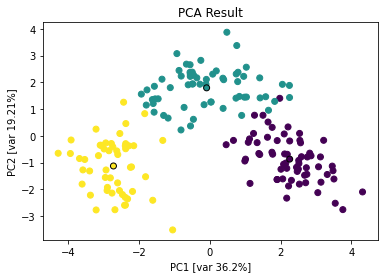

In [137]:
plt.scatter(*(np.transpose(pca_nor_X)),c=correction)
plt.xlabel("PC1 [var "+str(round(pca.explained_variance_ratio_[0]*100,2))+'%]')
plt.ylabel("PC2 [var "+str(round(pca.explained_variance_ratio_[1]*100,2))+'%]')
plt.title("PCA Result")
cen_gmm=[pca_nor_X[gmm_cluster_labels==idx].mean(axis=0) for idx in [0,1,2]]
plt.scatter(*(np.transpose(cen_gmm)),c=right_label,edgecolors='Black')
plt.show()

GMM의 결과는 95.51%로 좋은 편이지만, kmeans clustering 보다는 정확도가 떨어진다. 또한, 적합한 Gaussian 분포를 찾는 것이기에 분류의 안정성이 kmeans clustering보다 떨어진다.

### Spectral Clustering

<div>
<img src="SC.png" width="200"/>
</div>

 SC(Spectral Clustering)은 그래프를 기반으로 분류하는 방식이다. 이 방법에서 먼저 그래프 간의 거리에 Gaussian kernel(rbf)를 수행하여 유사도 행렬을 구한다. 그 후에 이 유사도 행렬의 고유벡터를 찾는 문제를 풀어, 그래프에서 각 그룹을 분류하는 기준을 구하고, 이를 통해 그래프 위에 각 Data를 분류를 한다. 이 방식 또한 그룹의 수를 넣어주어야 한다.

In [160]:
SC_nor=SpectralClustering(n_clusters=3,affinity="rbf").fit(pca_nor_X)
print("Answer:",y,'\n')
print("Prediction:",corrected_label(pca_nor_X,SC_nor,cen_pca))
print("accuracy:",round(sum(y==corrected_label(pca_nor_X,SC_nor,cen_pca))/len(y)*100,2),"%")

Answer: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
accuracy: 97.75 %


[0, 1, 2] => [1, 2, 0]


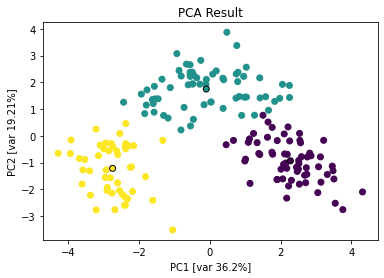

In [185]:
plt.scatter(*(np.transpose(pca_nor_X)),c=corrected_label(pca_nor_X,SC_nor,cen_pca,labels=True))
plt.xlabel("PC1 [var "+str(round(pca.explained_variance_ratio_[0]*100,2))+'%]')
plt.ylabel("PC2 [var "+str(round(pca.explained_variance_ratio_[1]*100,2))+'%]')
plt.title("PCA Result")
cen_SC=[pca_nor_X[SC_nor.labels_==idx].mean(axis=0) for idx in [0,1,2]]
plt.scatter(*(np.transpose(cen_SC)),c=[1,2,0],edgecolors='Black')
plt.show()

 normalization을 한 Data를 SC하였을 때, 분류의 정확도는 97.75%로 전체 분류 중에서 제일 정확했으며, 그 수치 또한 안정적이다. 또한, SC는 parameter를 잘 조정하면 더 좋은 성과를 낸다고 한다.

### Result: Wine Dataset Clustering Benchmark

|No.|Method|Accuracy|Rank|
|:-:|:----:|:------:|:--:|
|1|PCA + Normalization+SC|97.75 %|1|
|2|Normalization + Kmean|96.63 %|2|
|3|PCA + Normalization + kmean|96.63 %|2|
|4|Normalization + GMM|95.51 %|3|
|5|T-SNE+ Normalization + DBSCAN|95.51 %|3|
|6|Normalization + AP|94.94 %|4|
|7|T-SNE+Normalization + HC|93.82 %|5|
|8|T-SNE+ Normalization + Kmean|93.26 %|6|
|9|Normalization + HC|92.7 %|7|
|10|Kmean|70.22 %|8|
|11|Normalization + DBSCAN|69.66 %|9|




Wine Dataset Clustering을 하기 위해 다양한 방식을 시도해 보았다. 그랬을 때, Wine Dataset에서는  Normalization을 한 후에 Spectral Clustering을 하는 것이 가장 정확하였고, 안정성도 뛰어났다. 그러나 해당 방식은 Data 수가 많아지면 연산 횟수가 급격히 늘어난다는 단점이 있다. 따라서 Wine Dataset이 큰 경우는 Data를 Normalization을 한 후에 kmeans Clustering을 하는 것도 차선책으로 적합해 보인다. 그와 반면에 T-SNE를 이용한 방식은 T-SNE의 결과가 매 시도마다 달라지기에 그 순위가 높더라도, 안정성이 떨어져 신뢰하기 어렵다.

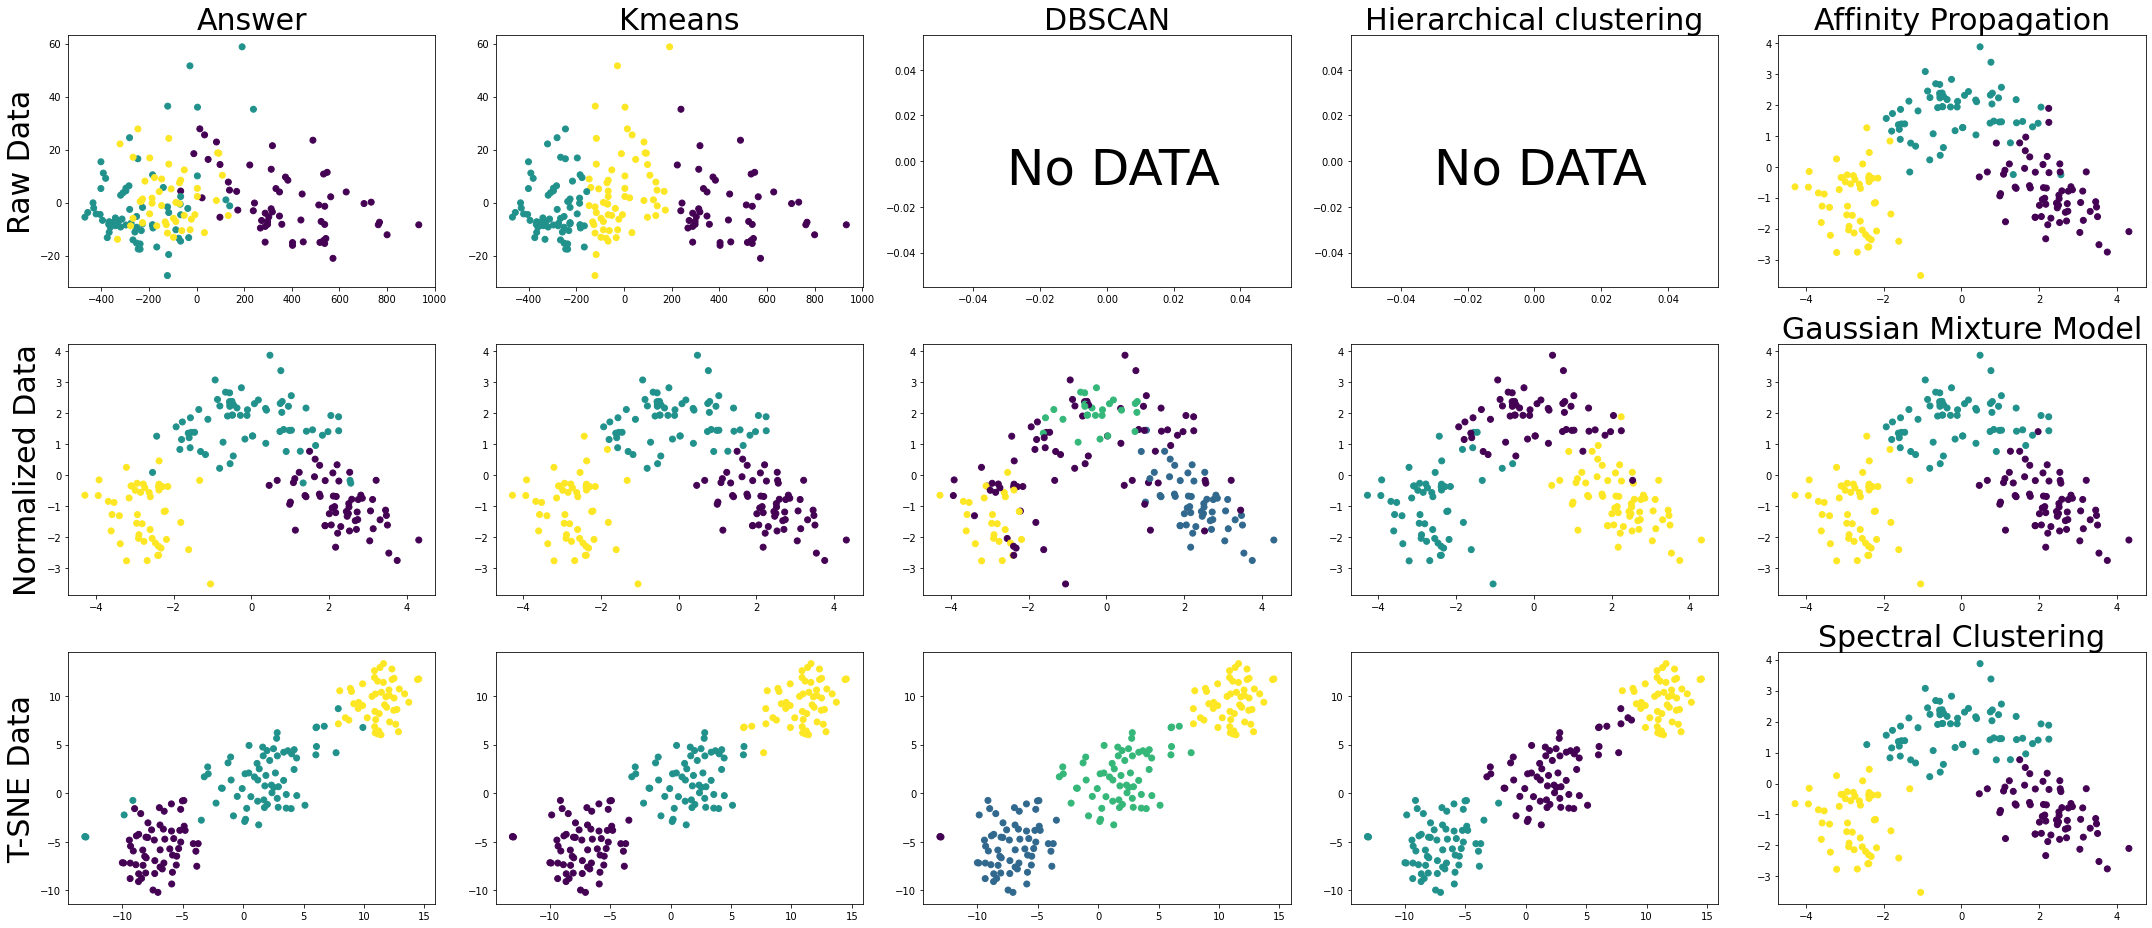

In [278]:
plt.figure(figsize=(30,13))

#Answer
plt.subplot(3,5,1)
plt.title("Answer",fontsize=30)
plt.scatter(*(np.transpose(pca_X)),c=y)
plt.ylabel("Raw Data",fontsize=30)
plt.subplot(3,5,6)
plt.scatter(*(np.transpose(pca_nor_X)),c=y)
plt.ylabel("Normalized Data",fontsize=30)
plt.subplot(3,5,11)
plt.scatter(*(np.transpose(tsne_nor_X)),c=y)
plt.ylabel("T-SNE Data",fontsize=30)

#Kmeans Clustering
plt.subplot(3,5,2)
plt.title("Kmeans",fontsize=30)
plt.scatter(*(np.transpose(pca_X)),c=corrected_label(X,kmeans,cen))
plt.subplot(3,5,7)
plt.scatter(*(np.transpose(pca_nor_X)),c=corrected_label(nor_X,kmeans_nor,cen_nor))
plt.subplot(3,5,12)
plt.scatter(*(np.transpose(tsne_nor_X)),c=corrected_label(tsne_nor_X,kmeans_tsne,cen_tsne))

#DBSCAN
plt.subplot(3,5,3)
plt.title("DBSCAN",fontsize=30)
plt.scatter(None,None)
plt.text(-0.03,-0.01,"No DATA",fontsize=50)
plt.subplot(3,5,8)
plt.scatter(*(np.transpose(pca_nor_X)),c=dbscan.labels_)
plt.subplot(3,5,13)
plt.scatter(*(np.transpose(tsne_nor_X)),c=dbscan_tsne.labels_)

#Hierarchical clustering
plt.subplot(3,5,4)
plt.title("Hierarchical clustering",fontsize=30)
plt.scatter(None,None)
plt.text(-0.03,-0.01,"No DATA",fontsize=50)
plt.subplot(3,5,9)
plt.scatter(*(np.transpose(pca_nor_X)),c=HC_nor.labels_)
plt.subplot(3,5,14)
plt.scatter(*(np.transpose(tsne_nor_X)),c=HC_tsne.labels_)

#Affinity Propagation
plt.subplot(3,5,5)
plt.title("Affinity Propagation",fontsize=30)
plt.scatter(*(np.transpose(pca_nor_X)),c=AP.labels_)

#Gaussian Mixture Model
plt.subplot(3,5,10)
plt.title("Gaussian Mixture Model",fontsize=30)
plt.scatter(*(np.transpose(pca_nor_X)),c=correction)

#Spectral Clustering
plt.subplot(3,5,15)
plt.title("Spectral Clustering",fontsize=30)
plt.scatter(*(np.transpose(pca_nor_X)),c=corrected_label(pca_nor_X,SC_nor,cen_pca))
plt.tight_layout()

모든 결과를 한번에 볼 수 있게 그래프를 그려 보았다. 그랬을 때, Raw Data를 그대로 사용하기 보다는 normalization을 하거나, T-SNE를 하여서 위치에 변화를 주는 것이 더 분류에 적합하다는 사실을 알 수 있다.

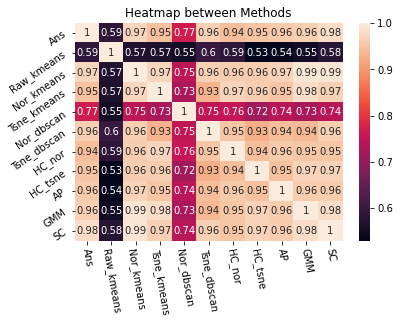

In [274]:
import pandas as pd
import seaborn as sns

df=pd.DataFrame({"Ans":y,
              "Raw_kmeans":corrected_label(X,kmeans,cen),
                 "Nor_kmeans":corrected_label(nor_X,kmeans_nor,cen_nor),
                 "Tsne_kmeans":corrected_label(tsne_nor_X,kmeans_tsne,cen_tsne),
                 "Nor_dbscan":corrected_label(nor_X,dbscan,cen_nor),
                 "Tsne_dbscan":corrected_label(tsne_nor_X,dbscan_tsne,cen_tsne),
              "HC_nor":corrected_label(nor_X,HC_nor,cen_nor),
                 "HC_tsne":corrected_label(tsne_nor_X,HC_tsne,cen_tsne),
             "AP":corrected_label(nor_X,AP,cen_nor),
                 "GMM":correction,
                 "SC":corrected_label(pca_nor_X,SC_nor,cen_pca)})


plt.title("Heatmap between Methods")
df_corr=df.corr()
sns.heatmap(df_corr, annot=True)
plt.xticks(rotation=-80)
plt.yticks(rotation=35)
plt.show()

각 방식들로 분류한 값들이 서로 얼마나 유사한지 Heatmap을 그려서 확인해 보았다. Heatmap를 보면, 성능이 아주 나쁜 Raw_kmeans와 Nor_dbscan을 제외하고, 서로 간의 높은 유사성을 보여준다. 이는 특정 몇 개의 Data가 매우 분류하기 어렵다는 것을 의미한다. 따라서 좀 더 정확한 분류를 위해서는 Support Vector Machine에서 하였던 것처럼, 위치를 변경하는 새로운 방법이 필요하다고 생각한다. 하지만 실제 Data를 Clustering 할 때는 Clustering이 비지도 학습이기에 정확도를 알 수가 없다. 그래서 어떤 변환 방법이 Clustering에 적합지 모른다는 문제가 남아있다. 이를 위해서 특정 clustering의 평가 지표로 "silhouette score"와 "Dune Index"가 있다. 이들은 다음과 같이 정의된다.

$$(Silhouette\;Score)=\frac{가장 \; 가까운\;다른\;그룹과의\;평균 거리-같은\;그룹\;내의\;점들의\;평균\;거리}{가장\;멀리\;떨어진\;점과의\;거리}$$

$$(Dune\;Index)=\frac{그룹 \; 간의\;최소\;거리}{그룹 \; 내의\; 최대\; 거리}$$

이 둘 중에 sklearn에는 silhouette score만 구현되어 있기에 이를 기반으로 어떤 분류가 좋은 방법인지 재평가해보았다.

In [308]:
from sklearn.metrics import silhouette_score

X_data=[nor_X, X, nor_X, tsne_nor_X,nor_X,tsne_nor_X,nor_X,tsne_nor_X, nor_X,nor_X,nor_X]
sil_score=[silhouette_score(X_data[idx],df.iloc[:,idx]) for idx in range(11)]

'''
for idx, col in enumerate(df.columns):
    print(col,":",round(sil_score[idx],4))
'''

'\nfor idx, col in enumerate(df.columns):\n    print(col,":",round(sil_score[idx],4))\n'

|No.|Method|Accuracy|Rank|silhouette score|
|:-:|:----:|:------:|:--:|:---:|
|1| T-SNE+ Normalization + Kmean|93.26 %|6|0.627|
|2|T-SNE+Normalization + HC|93.82 %|5|0.592|
|3|T-SNE+ Normalization + DBSCAN|95.51 %|3|0.573|
|4|Kmean|70.22 %|8|0.5711|
|5| Normalization + Kmean|96.63 %|2|0.2849|
|6|PCA + Normalization+SC|97.75 %|1|0.2843| 
|7| Normalization + GMM|95.51 %|3|0.2828|
|8|Normalization + AP|94.94 %|4|0.2803|
|9| Normalization + HC|92.7 %|7|0.2774| 
|11|Normalization + DBSCAN|69.66 %|9|0.116|

정확도가 높은 Clustering 방식이 높은 silhouette score를 가질 것이라는 예상과 달리, silhouette score는 좋은 지표가 되지 못했다. 실제로 silhouette score는 얼마나 잘 모여있는지를 평가하는 지표로, 기하학적으로 퍼진 data에 대해서는 좋은 평가 지표가 되지 못한다고 한다. 그렇기에 같은 점들을 모아주는 T-SNE와, 단순히 거리를 기준으로 분류하는 kmean clustering이 좋은 평가를 받았다. 따라서 silhouette score는 Clustering에서 참고 사항이 될 순 있지만, 신뢰성 있는 기준은 되지 못한다. 또한 비지도 학습에서 어떤 Data 변환이 Clustering에 적합한지 평가하는 문제는 여전히 남아있다.

#### Best Clustering Result analysis

Wine를 분류할 때 가장 중요한 기준이 무엇인지 Clustering 결과를 분석해서 평가해 보았다. 먼저 Clustering은 Normalization한 Data에서 가장 잘 이루어졌기에, Normalized Data를 PCA 분석해보았다.

In [309]:
pca.fit(nor_X)

for idx,ra_co in enumerate(zip(pca.explained_variance_ratio_,pca.components_)):
    print('PC '+str(idx+1)+') \n Components:\t'+str(ra_co[1])+'\n variance:\t'+str(ra_co[0]*100)+'%')

PC 1) 
 Components:	[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
  0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
  0.28675223]
 variance:	36.19884809992634%
PC 2) 
 Components:	[-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
  0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
 -0.36490283]
 variance:	19.207490257008967%


PCA는 분산을 유지하는 차원 축소법이기에 PC 1에 해당하는 축이 Wine의 다양성을 만드는 방향이라고 생각할 수 있다. 그렇기에 PC1의 components 성분의 크기가 큰 차원이 Wine을 분류할 때 중요한 요소라고 생각할 수 있을 것이다. 그때 (7,6,12,9,8,11,13,2,4,1,5,10,3) 순으로 Wine 분류에 중요하다고 볼 수 있다. 이는 다음과 같다.

Flavanoids > Total Phenols > OD280/OD315 of diluted wines > Proanthocyanins > Nonflavanoid phenols > Hue > Proline > Malic acid > Alcalinity of ash > Alcohol > Magnesium > Color intensity > Ash

 실제 소믈리에가 Wine 감별하는 것을 들어보면, 그들은 주로 병의 모양, Wine의 색 및 투명도, Wine의 맛 (특히 포도의 원산지), 오크향을 주로 평가한다. 특히 포도의 원산지, 오크향, Wine의 색은 빠지지 않고 고려한다.\
 한편, PCA 결과에서 중요하다고 나온 Flavonoid는 식물이 만드는 이차대산물이고, Red Wine에 주로 발견된다고 한다. 또한 Phenol은 오크 목재에 포함되어 있는 성분으로 당도에 Wine의 당도에 영향을 준다고 한다. OD280/OD315 of diluted wines은 Wine에 함유된 특정 단백질의 양을 나타낸다고 한다. Proanthocyanidin은 포도의 잎에서 주로 발견되는 성분이라고 한다. 이러한 사실들은 실제로 앞선 분류가 어느 정도 실제 소믈리에가 Wine을 분류하는 일맥상통한다는 것을 의미한다.

In [368]:
cen_sc2=[X[df.SC==idx].mean(axis=0) for idx in [0,1,2]]


print('\t  Flavanoids   Total Phenols   OD280/OD315  Proanthocyanins Nonflavanoid phenols')
for idx, point in enumerate(cen_sc2):
    print("Class ",str(idx)," :",
          round(point[7],4),'\t',round(point[6],4),' \t',
          round(point[12],4),'\t',round(point[9],4),'\t',round(point[8],4))

	  Flavanoids   Total Phenols   OD280/OD315  Proanthocyanins Nonflavanoid phenols
Class  0  : 0.2921 	 3.0032  	 1100.2258 	 5.4535 	 1.9221
Class  1  : 0.3613 	 2.0285  	 507.209 	 3.0209 	 1.5973
Class  2  : 0.4508 	 0.798  	 627.551 	 7.3433 	 1.1631


따라서 Dataset의 Wine은 해당 주요 성분의 수치가 위와 같은 값 근처에 있는 세 종류 Wine으로 나뉜다는 사실을 알 수 있다.